# Assessment 4

by Napatchol Thaipanich (nt375)

## Pre-process

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Create a DataFrame (df)

By reading the CSV file as the dataset from this link, [kc_house_data_small.csv](http://raptor.kent.ac.uk/~ds756/Data/kc_house_data_small.csv)

In [2]:
df = pd.read_csv("http://raptor.kent.ac.uk/~ds756/Data/kc_house_data_small.csv")

## Task 1 (10 marks)

Create a feature in the DataFrame called `unit_price` that contains the price per square foot for each sale using the `sqft_living` feature.

In [3]:
df["unit_price"] = df["price"] / df["sqft_living"]
df["unit_price"]

0       188.050847
1       140.243902
2       419.753086
3       589.820359
4       200.534759
           ...    
2608    235.294118
2609    173.160173
2610    394.216667
2611    250.000000
2612    318.627451
Name: unit_price, Length: 2613, dtype: float64

## Task 2 (20 marks)

Create a DataFrame that consists of two columns:

- `zipcode`: referred to "postcode"
- `avg_sqf_living`: the average price per `sqf_living`; using `unit_price` from the last task, Task1.

**Note**: Each zip code will have its row, and the second column will contain the **mean** price of all the sales in that zip code.

In [4]:
avg_price_zipcode_df = df.groupby("zipcode")['unit_price'].mean().reset_index()
avg_price_zipcode_df.columns = ['zipcode', 'avg_unit_price']
avg_price_zipcode_df

,zipcode,avg_unit_price
0,98001,155.791298
1,98002,152.284512
2,98003,158.400200
3,98004,481.385148
4,98005,294.317493
...,...,...
65,98177,288.462758
66,98178,177.014663
67,98188,160.873309
68,98198,180.486717


## Task 3 (20 marks)

### 3.1 Create a DataFrame 

With two columns: 
- `bedrooms`
- `mean_price`

**Note**:
Each unique count of bedrooms will have its row, and the second column will be the mean price for properties with that many bedrooms. 

In [5]:
mean_price_bedrooms_df = df.groupby("bedrooms")['unit_price'].mean().reset_index()
mean_price_bedrooms_df.columns = ['bedrooms','mean_price']
mean_price_bedrooms_df

,bedrooms,mean_price
0,0,152.086444
1,1,401.536056
2,2,342.453922
3,3,262.202315
4,4,233.332738
5,5,232.872054
6,6,225.960185
7,7,272.374072
8,8,210.299380
9,10,180.055402


### 3.2 Display the DataFrame in the bar chart form

- Use a bar plot to display the DataFrame
- Give each bar its colour

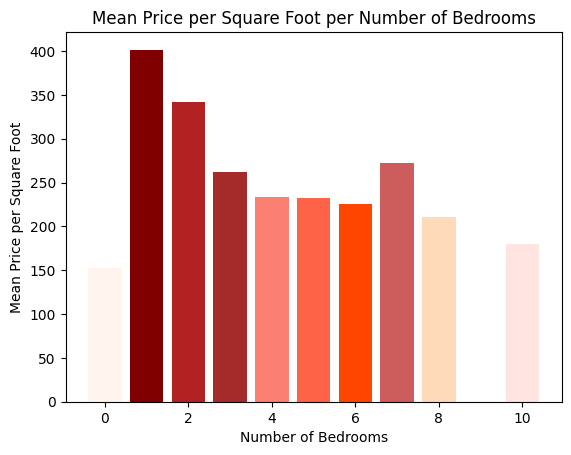

In [6]:
plt.bar(mean_price_bedrooms_df["bedrooms"], mean_price_bedrooms_df["mean_price"], color=["seashell", "maroon", "firebrick", "brown", "salmon", "tomato", "orangered", "indianred", "peachpuff", "mistyrose"])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Mean Price per Square Foot")
plt.title("Mean Price per Square Foot per Number of Bedrooms")
plt.show()

## Task 4 (20 marks)

- Show a graph that showed `long` versus `lat`, choosing scatter plots
- Set colour
    - <code style="color : red">red</code>: for the waterfront properties
    - <code style="color : blue">blue</code>: for all others called `Non-Waterfront`.
- Title the plot and label the axis appropriately.
  - xlabel: named "Longitude"
  - ylabel: named "Latitude"
  - title: named "Analysis of Waterfront and Non-Waterfront Properties: Longitude vs Latitude"

### Create two separate DataFrames

two DataFrames:
- waterfront
- non-waterfront

In [7]:
waterfront_df = df[df['waterfront'] == 1]
non_waterfront_df = df[df['waterfront'] == 0]

### Show the graph

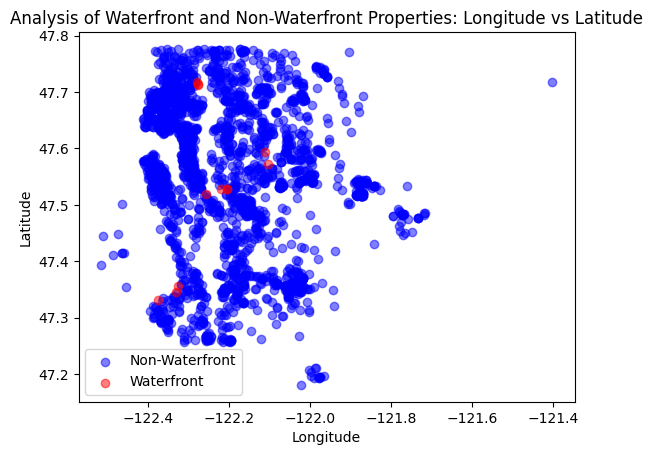

In [8]:
plt.scatter(non_waterfront_df['long'], non_waterfront_df['lat'], color='blue', label='Non-Waterfront', alpha=0.5)
plt.scatter(waterfront_df['long'], waterfront_df['lat'], color='red', label='Waterfront', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Analysis of Waterfront and Non-Waterfront Properties: Longitude vs Latitude')
plt.legend()
plt.show()

## Task 5 (30 marks)

### 5.1 Create a time-series from the DataFrame (set the index to the date)

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

### 5.2 Show the Graph displaying the daily mean price data

#### Create the DataFrame

By daily aggregating the price column based on the date column (time-series data) scope.

In [10]:
daily_mean_price_df = df.resample('D')['price'].mean()

#### Plot the graph

- plot the daily mean price from the DataFrame, `daily_mean_price_df`.
- draw a line from the smallest daily average to the highest daily average on the graph plotting the daily mean price data.

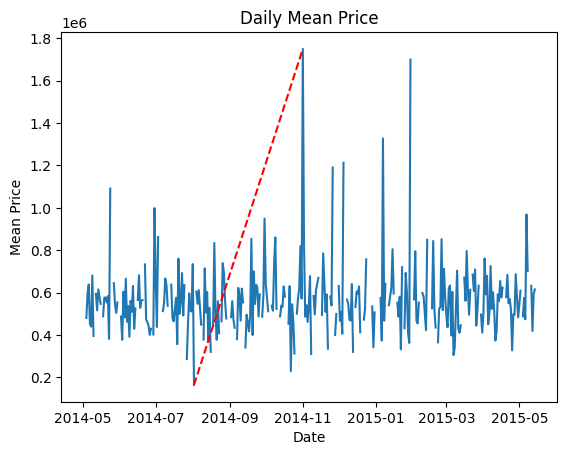

In [11]:
plt.plot(daily_mean_price_df, label='Daily Mean Price')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.title('Daily Mean Price')

plt.plot([daily_mean_price_df.idxmin(), daily_mean_price_df.idxmax()],
         [daily_mean_price_df.min(), daily_mean_price_df.max()],
         color='red', linestyle='--', label='Min to Max Overlay Line')

plt.show()
